# Phase fraction
This is an example notebook on how to use the software package for the phase fraction fitting.
The dataset is composed of cruciform stainless steel sample treated with load path change, with phase transformation from FCC (-γ) to BCC(-α) structures. 
The data is pre-processed and reduced to a transmission 3D-array with dimension (pixel_x,pixel_y,lambda).

# Importing python modules and functions

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import h5py
import fnmatch
from os import listdir
from PIL import Image

import sys
#update the following line to the downloaded software location
sys.path.append('C:\\Users\\busi_m\\Workspace\\neutronimaging\\ToFImaging\\python_modules')
import phasefitting_2D
import reduction_tools

# Loading Data and preparing for the fits

## Loading experimental data 

In [2]:
# loading data
path = '4-sigma_sample2\\'
files = sorted(fnmatch.filter(listdir(path),'*.tif'))
T = np.zeros((1024,1024,51))
for i in range(0,len(files)):
    T[:,:,i] = Image.open(path+'\\'+files[i])

# loading a pre-defined mask
arrays={}
data = h5py.File('mask.mat')
for k, v in data.items():
    arrays[k] = np.array(v)
mask = arrays['mask']
mask = mask.transpose((1,0))

# defining spectral range
spectrum = np.linspace(2.5,4.5,51)

## Loading reference phase spectra

In [3]:
# Preparing reference spectra for fitting code.
phase1lac = np.loadtxt('ss304_g.txt')
phase2lac = np.loadtxt('ss304_a.txt')
phase3lac = np.loadtxt('ss304_e.txt')

phase_spectrum = phase1lac[:,0]
phase1lac = phase1lac[:,1]
phase2lac = phase2lac[:,1]
phase3lac = phase3lac[:,1]

# Data fitting
Data is now ready for fitting. We fit both using 2 phases linear combination (-α,-γ). For demonstration we also test the three phases combination (-α,-γ,-ε), this is however not physically explained yet. Possibly different texture effects are captured by this method.

We first test on a single pixel to make sure that code works, then proceed on full image fitting.

## Two Phases

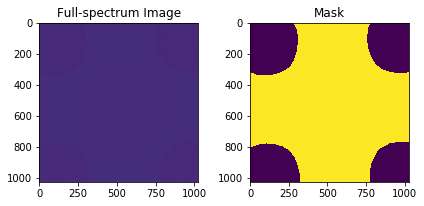

phase fraction (ph1 %) =  79.28779936373817 %


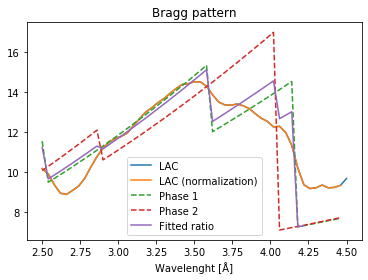

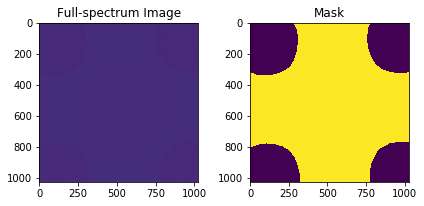

phase fraction (ph1 %) =  65.3778729085857 %


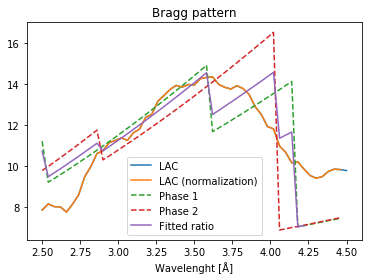

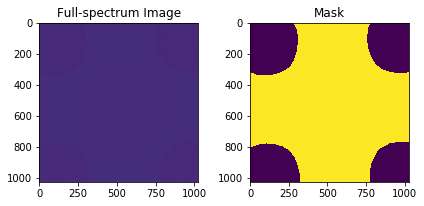

phase fraction (ph1 %) =  67.12433995451501 %


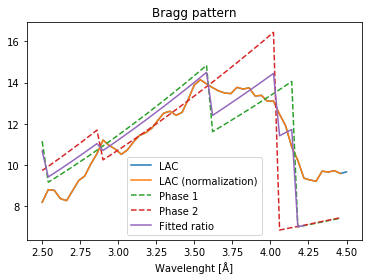

In [7]:
lambda_range_norm=[2.5, 4.5]
lambda_range_edges=[2.5, 4.25]
method = 'lmsquare'
SG_w = 3
SG_n = 1

pixel=[500,100]
phasefitting_2D.phase_ratio_linearcomb_2D(T,spectrum,
                                        phase1lac,phase2lac,phase_spectrum,
                                        lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        bool_print=0,debug_idx=pixel)
pixel=[500,300]
phasefitting_2D.phase_ratio_linearcomb_2D(T,spectrum,
                                        phase1lac,phase2lac,phase_spectrum,
                                        lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        bool_print=0,debug_idx=pixel)
pixel=[500,500]
phasefitting_2D.phase_ratio_linearcomb_2D(T,spectrum,
                                        phase1lac,phase2lac,phase_spectrum,
                                        lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        bool_print=0,debug_idx=pixel)

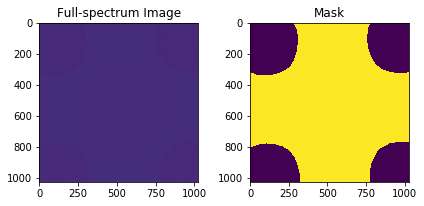

100%|████████████████████████████████████| 1024/1024 [1:27:52<00:00,  5.15s/it]


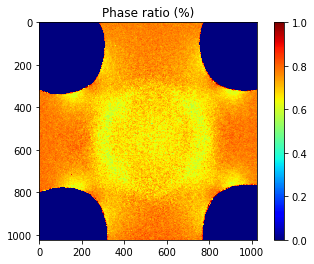

In [8]:
fit_2phase = phasefitting_2D.phase_ratio_linearcomb_2D(T,spectrum,phase1lac,phase2lac,
                                        phase_spectrum,lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        bool_print=1)
scipy.io.savemat('fit_2phase.mat',fit_2phase)

## Three phases

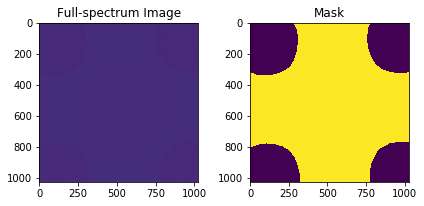

Phase fraction 1 (ph1 %) =  57.287999462548854 %
Phase fraction 2 (ph2 %) =  28.206991913504066 %
Phase fraction 3 (ph3 %) =  13.22122508319466 %


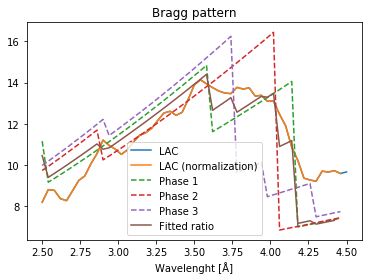

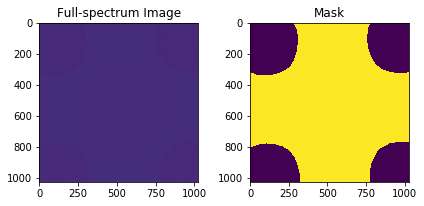

Phase fraction 1 (ph1 %) =  57.287999462548854 %
Phase fraction 2 (ph2 %) =  28.206991913504066 %
Phase fraction 3 (ph3 %) =  13.22122508319466 %


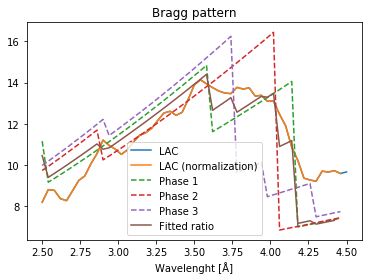

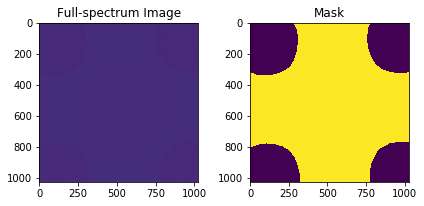

Phase fraction 1 (ph1 %) =  57.287999462548854 %
Phase fraction 2 (ph2 %) =  28.206991913504066 %
Phase fraction 3 (ph3 %) =  13.22122508319466 %


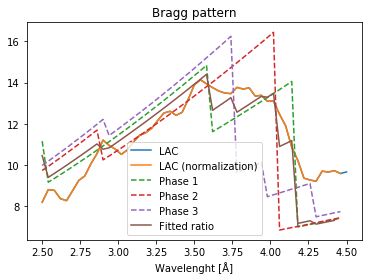

In [9]:

lambda_range_norm=[2.5, 4.5]
lambda_range_edges=[2.5, 4.5]
method = 'lmsquare'
SG_w = 3
SG_n = 1

dx=[500,100]
fit = phasefitting_2D.phase_ratio_linearcomb_three_2D(T,spectrum,phase1lac,phase2lac,phase3lac,
                                        phase_spectrum,lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        debug_idx=pixel)
dx=[500,300]
fit = phasefitting_2D.phase_ratio_linearcomb_three_2D(T,spectrum,phase1lac,phase2lac,phase3lac,
                                        phase_spectrum,lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        debug_idx=pixel)
dx=[500,500]
fit = phasefitting_2D.phase_ratio_linearcomb_three_2D(T,spectrum,phase1lac,phase2lac,phase3lac,
                                        phase_spectrum,lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        debug_idx=pixel)

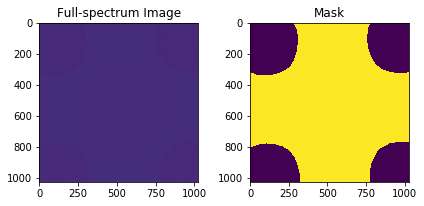

100%|████████████████████████████████████| 1024/1024 [2:46:25<00:00,  9.75s/it]


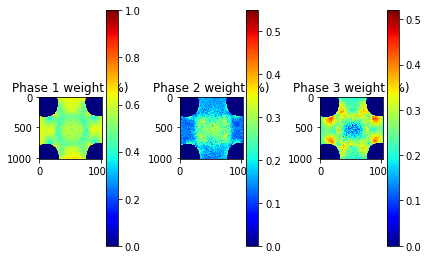

In [10]:
fit_3phase = phasefitting_2D.phase_ratio_linearcomb_three_2D(T,spectrum,phase1lac,phase2lac,phase3lac,
                                        phase_spectrum,lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        bool_print=1)
scipy.io.savemat('fit_3phase.mat',fit_3phase)

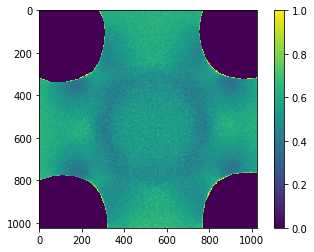

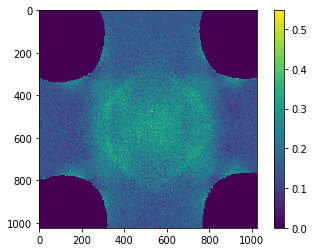

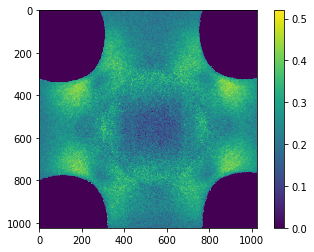

In [11]:
plt.imshow(fit_3phase['phase1_ratio'])
plt.colorbar()
plt.show()
plt.close()
plt.imshow(fit_3phase['phase2_ratio'])
plt.colorbar()
plt.show()
plt.close()
plt.imshow(fit_3phase['phase3_ratio'],colo)
plt.colorbar()
plt.show()
plt.close()